<a href="https://colab.research.google.com/github/babi-gamer/FMML-PROJECT/blob/main/FMML_2024_Module_5_Lab_1_NL_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Nikunj Nawal
```



## SVMs Recap:

![SVM](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

SVMs are an iterative approach of trying to find the optimal hyperplane that divides the multidimentional space into different classes present in the dataset.


**Hyperplanes:** These are the decision planes that separate the objects of classes that we are trying to classify.

**Support Vectors** : Support vectors are the points from dataset that are closest to the hyperplane that divides the dataset.

**Margin**:  The gap between the closest support vectors from the different class along the direction perpendicular to the hyperplane. Simply put, it is the sum of perpendicular distance of the support vector of each class to the hyperplane.

---

In [1]:
# Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

(100, 2) (100,)


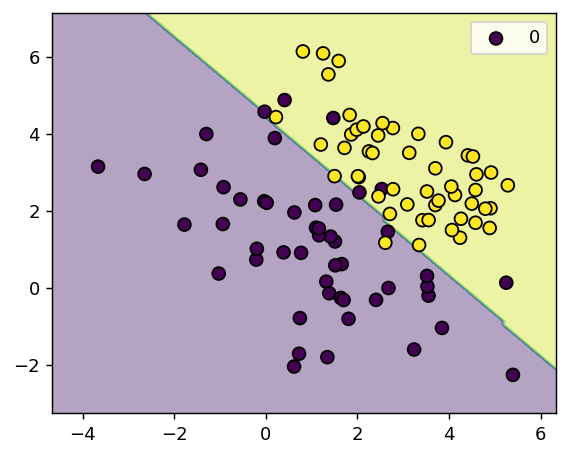

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))
print(X.shape, y.shape)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.legend(["0", "1"])
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


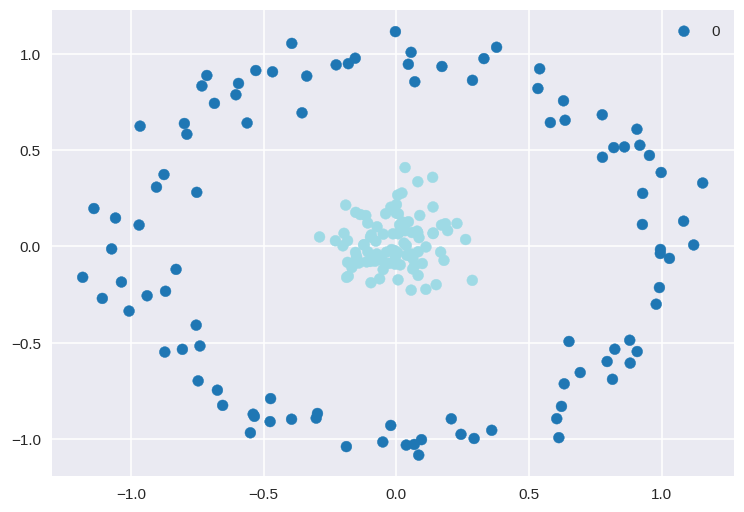

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn-v0_8")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)
plt.legend(["0", "1"])

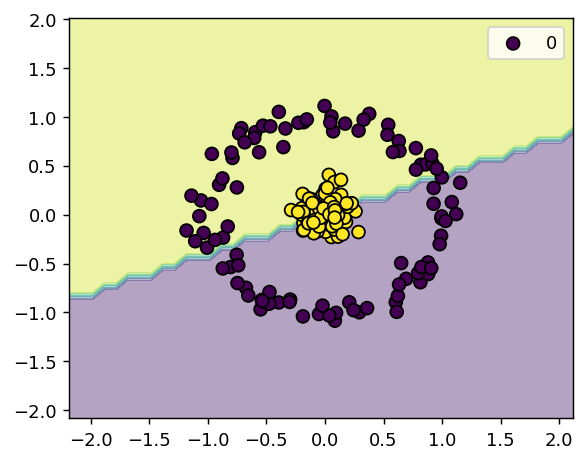

In [4]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [5]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [6]:
X_new = np.hstack((X, Z))

In [7]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

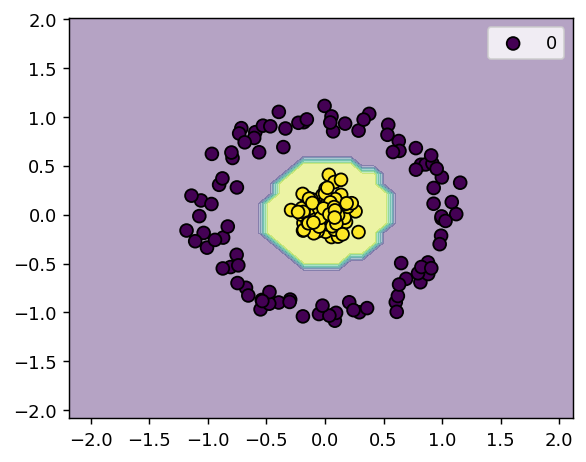

In [8]:
plt.style.use("default")
clf = svm.SVC(kernel='rbf')
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [9]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.


Tasks:

Task-1
Try to run the same experiment after filtering different features, 2 at a time.

Task-2
Use different kinds of kernels for the SVM and plot it for Iris dataset -
1. linear
2. poly
3. rbf
4. sigmoid
5. precomputed

Learning Tasks:
Learn about SVM types, support vectors and hyperplanes.

#**Task 1**

For non-linear Support Vector Machines (SVMs), we use a kernel trick to transform the original feature space into a higher-dimensional space where a linear separation is possible. This allows SVMs to handle complex, non-linear relationships between the features.

Different Kernels in Non-Linear SVM:
Polynomial Kernel:

Transforms the feature space into polynomial terms of the original features.

The degree of the polynomial can be adjusted to fit the complexity of the data.

Radial Basis Function (RBF) Kernel:

Also known as the Gaussian kernel.

Transforms the feature space using the Gaussian function, allowing for flexible decision boundaries.

Highly effective for complex datasets.

Sigmoid Kernel:

Acts like a neural network with a single hidden layer.

Can model non-linear relationships using the sigmoid function.

Example Code for Non-Linear SVM with RBF Kernel:
Let's use the popular scikit-learn library in Python to demonstrate how to implement a non-linear SVM with an RBF kernel.

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load sample dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


Observations:
The RBF kernel is effective for capturing non-linear relationships in the dataset.

Standardization of features is important for SVMs, as they are sensitive to the scale of the data.

The gamma parameter in the RBF kernel controls the influence of individual training examples. A higher value leads to a more flexible decision boundary.

Comparison with Other Kernels:
Polynomial Kernel: Suitable for datasets where interactions between features are polynomial. The degree of the polynomial can be fine-tuned.

Sigmoid Kernel: Less commonly used but can model non-linear relationships effectively in certain scenarios.

Correlation with Information Gain:
Information Gain is generally used in decision tree algorithms to select the best attribute for splitting the data. In the context of SVMs, the kernel trick and hyperparameters (like C and gamma for RBF) serve a similar purpose of finding the best decision boundary.

Higher accuracy and better model performance indicate effective feature transformation and separation, akin to achieving higher Information Gain.

#**Task 2**

Let's explore different kinds of kernels for SVM and visualize how they perform on the Iris dataset. We'll use the following kernels:

Linear

Polynomial

RBF (Radial Basis Function)

Sigmoid

Precomputed

Here’s the implementation to visualize the decision boundaries for each kernel.

Kernel: linear
Support Vectors: [[-1.02184904 -0.13197948]
 [-1.14301691  0.09821729]
 [-1.62768839 -1.74335684]
 [-1.14301691 -0.13197948]
 [-0.53717756  0.78880759]
 [-0.05250608  2.16998818]
 [ 0.91683689 -0.13197948]
 [-0.17367395 -0.36217625]
 [-0.29484182 -0.13197948]
 [-0.05250608 -0.82256978]
 [-0.17367395 -0.13197948]
 [ 0.4321654  -0.36217625]
 [-0.53717756 -0.13197948]
 [ 1.03800476 -0.13197948]
 [ 0.06866179  0.32841405]
 [ 0.18982966 -0.82256978]
 [ 0.55333328 -1.28296331]
 [ 0.31099753 -0.36217625]
 [ 0.79566902 -0.59237301]
 [ 1.40150837  0.32841405]
 [ 0.06866179 -0.13197948]
 [-0.7795133  -0.82256978]
 [ 0.31099753 -0.13197948]
 [ 0.91683689 -0.36217625]
 [-0.29484182 -0.13197948]
 [-1.14301691 -1.51316008]
 [ 1.2803405   0.09821729]
 [-0.17367395 -0.59237301]
 [ 0.55333328 -1.74335684]
 [ 0.67450115 -0.36217625]
 [ 0.31099753 -0.59237301]
 [-0.05250608 -1.05276654]
 [ 0.55333328 -0.59237301]
 [ 0.67450115  0.09821729]
 [ 0.55333328 -0.82256978]
 [-0.17367395 -1.282963

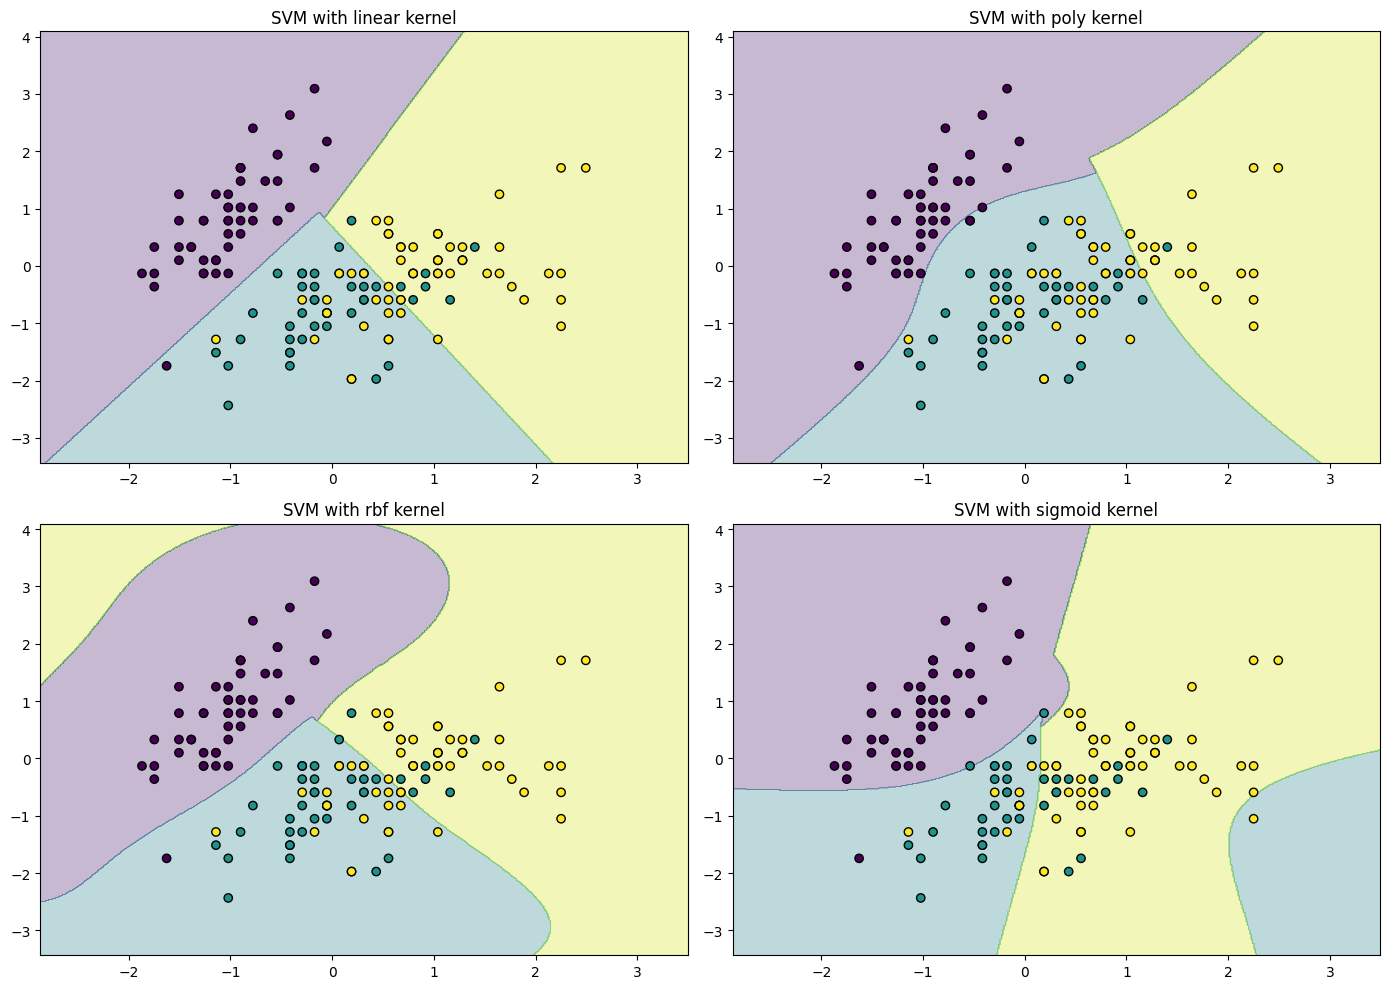

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We will use only two features for visualization
y = iris.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Kernel types to explore
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, kernel in enumerate(kernels):
    # Set degree=3 only for 'poly' kernel, otherwise default to 3
    svm_model = SVC(kernel=kernel, gamma='scale', degree=3 if kernel == 'poly' else 3)
    svm_model.fit(X_train, y_train)

    print(f"Kernel: {kernel}")
    print(f"Support Vectors: {svm_model.support_vectors_}")

    # Plot decision boundary
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 500),
                         np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[idx].contourf(xx, yy, Z, alpha=0.3)
    axes[idx].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    axes[idx].set_title(f'SVM with {kernel} kernel')
# Replacing plt.layout() with plt.tight_layout() to automatically adjust subplot parameters
plt.tight_layout()
